成功读取 Excel 文件！前 5 行数据：
   Rowid  DIST_INT  COUNT      AREA       MEAN
0      1        30  21231  19107900  34.487234
1      2        60   6237   5613300  37.989956
2      3        90   6467   5820300  39.019703
3      4       120   6260   5634000  39.834682
4      5       150   6430   5787000  40.369686
D:\Douments\UNIVERSITY\2025-2026_2\GEOG_4503\Tianjin_Haihe_Cooling\Maps\Haihe_Cooling_Curve.png


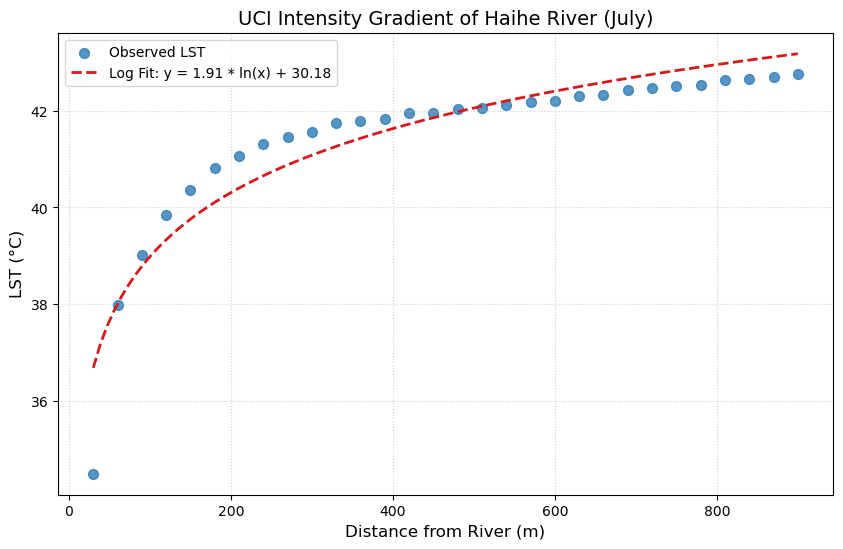

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


file_path = r"D:\Douments\UNIVERSITY\2025-2026_2\GEOG_4503\Tianjin_Haihe_Cooling\Data\July_Gradient.xlsx"

try:
    df = pd.read_excel(file_path)
    print("成功读取 Excel 文件！前 5 行数据：")
    print(df.head())
except FileNotFoundError:
    print("❌ 错误：找不到文件！请检查 file_path 是否正确。")

def log_decay(x, a, b):
    return a * np.log(x) + b

x_data = df['DIST_INT']
y_data = df['MEAN']


popt, pcov = curve_fit(log_decay, x_data, y_data)
a_opt, b_opt = popt

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = log_decay(x_fit, a_opt, b_opt)


plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(x_data, y_data, color='#2c7bb6', s=50, label='Observed LST', alpha=0.8)
plt.plot(x_fit, y_fit, color='#d7191c', linewidth=2, linestyle='--', 
         label=f'Log Fit: y = {a_opt:.2f} * ln(x) + {b_opt:.2f}')

plt.title('UCI Intensity Gradient of Haihe River (July)', fontsize=14)
plt.xlabel('Distance from River (m)', fontsize=12)
plt.ylabel('LST (°C)', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
save_path = r"D:\Douments\UNIVERSITY\2025-2026_2\GEOG_4503\Tianjin_Haihe_Cooling\Maps\Haihe_Cooling_Curve.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight') 
print(f"{save_path}")
plt.show()